
# Prediction of epidemic trends in Covid-9 with logistic model and Machine learning technics

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("Active Cases.csv")
df.shape
df

,State,District,Jan 30,Jan 31,Feb 1,Feb 2,Feb 3,Feb 4,Feb 5,Feb 6,...,November 20,November 21,November 22,November 23,November 24,November 25,November 26,November 27,November 28,November 29
0,Andhra Pradesh,Andhra Pradesh,0,0,0,0,0,0,0,0,...,15382,14770,14249,13394.0,13024.0,12673.0,12615.0,12137.0,11571.0,8397.0
1,Andhra Pradesh,Anantapur,0,0,0,0,0,0,0,0,...,465,402,370,349.0,326.0,302.0,309.0,288.0,269.0,242.0
2,Andhra Pradesh,Chittoor,0,0,0,0,0,0,0,0,...,828,806,769,639.0,693.0,643.0,617.0,640.0,573.0,577.0
3,Andhra Pradesh,East Godavari,0,0,0,0,0,0,0,0,...,4881,4640,4475,4353.0,4175.0,4171.0,4143.0,4037.0,3945.0,1190.0
4,Andhra Pradesh,Guntur,0,0,0,0,0,0,0,0,...,1724,1694,1608,1552.0,1552.0,1496.0,1481.0,1436.0,1361.0,1301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,Unknown Total,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,District Wise Total,NaN,1,1,1,2,3,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
812,MOHFW,NaN,1,1,1,2,3,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
813,Check,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df=df.dropna()
df=df[df["State"] == df["District"]]
df=df.drop(columns = ["District"])
df=df.reset_index(drop = True)
df.head()

,State,Jan 30,Jan 31,Feb 1,Feb 2,Feb 3,Feb 4,Feb 5,Feb 6,Feb 7,...,November 20,November 21,November 22,November 23,November 24,November 25,November 26,November 27,November 28,November 29
0,Andhra Pradesh,0,0,0,0,0,0,0,0,0,...,15382,14770,14249,13394.0,13024.0,12673.0,12615.0,12137.0,11571.0,8397.0
1,Arunachal Pradesh,0,0,0,0,0,0,0,0,0,...,1127,1051,1040,1007.0,1004.0,968.0,926.0,911.0,888.0,851.0
2,Bihar,0,0,0,0,0,0,0,0,0,...,5604,5416,5190,5116.0,5017.0,5426.0,5507.0,5546.0,5586.0,5649.0
3,Chattisgarh,0,0,0,0,0,0,0,0,0,...,19817,20659,21393,21926.0,22815.0,24676.0,23957.0,21839.0,20978.0,20641.0
4,Goa,0,0,0,0,0,0,0,0,0,...,1295,1261,1170,1141.0,1221.0,1281.0,1316.0,1313.0,1348.0,1327.0


In [4]:
# %matplotlib inline
# plt.scatter(df.State, df["Jan 30"], color = "red", marker = "+")

In [5]:
df.sum(axis = 0)

State          Andhra PradeshArunachal PradeshBiharChattisgar...
Jan 30                         000000001000000000000000000000000
Jan 31                         000000001000000000000000000000000
Feb 1                          000000001000000000000000000000000
Feb 2                          000000002000000000000000000000000
                                     ...                        
November 25                                               322914
November 26                                               324275
November 27                                               321310
November 28                                               318110
November 29                                               250239
Length: 306, dtype: object

In [6]:
df.describe()

,July 12,July 13,July 14,July 16,July 17,July 18,July 19,July 20,July 21,July 22,...,November 10,November 11,November 12,November 23,November 24,November 25,November 26,November 27,November 28,November 29
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,...,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,5449.545455,5682.393939,5852.727273,6308.727273,6629.575758,6933.181818,7277.333333,8631.454545,7984.848485,7967.333333,...,11101.333333,11062.333333,10991.242424,9549.696970,9644.151515,9785.272727,9826.515152,9736.666667,9639.696970,7583.000000
std,9538.831080,9865.248448,9942.593510,10253.630215,10673.076083,11249.830564,11768.394279,13996.280426,12788.185195,12995.013521,...,16512.221070,16485.173201,16369.025244,13930.635174,14082.881967,14279.305980,14272.626994,14153.405546,14138.770225,13680.843932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,219.000000,214.000000,196.000000,183.000000,192.000000,212.000000,234.000000,236.000000,252.000000,326.000000,...,922.000000,958.000000,1002.000000,859.000000,854.000000,886.000000,926.000000,904.000000,858.000000,0.000000
50%,909.000000,1026.000000,1084.000000,1272.000000,1337.000000,1425.000000,1417.000000,1469.000000,1552.000000,1709.000000,...,4054.000000,4009.000000,3668.000000,3038.000000,3175.000000,3248.000000,3245.000000,3252.000000,3283.000000,1194.000000
75%,5660.000000,5671.000000,5761.000000,7290.000000,8130.000000,9019.000000,9603.000000,9733.000000,9625.000000,8825.000000,...,18188.000000,17484.000000,17352.000000,13394.000000,13024.000000,12673.000000,12615.000000,12137.000000,11571.000000,7888.000000
max,46927.000000,48199.000000,47915.000000,46717.000000,47785.000000,49455.000000,50297.000000,51710.000000,51800.000000,51636.000000,...,78812.000000,78538.000000,77931.000000,64292.000000,64539.000000,65234.000000,64615.000000,64014.000000,64964.000000,64719.000000


In [7]:
dates = list(df.columns)[1:]

In [8]:
df.dtypes

State           object
Jan 30          object
Jan 31          object
Feb 1           object
Feb 2           object
                ...   
November 25    float64
November 26    float64
November 27    float64
November 28    float64
November 29    float64
Length: 306, dtype: object

In [9]:
df = df[dates].astype(int)
df.dtypes

Jan 30         int32
Jan 31         int32
Feb 1          int32
Feb 2          int32
Feb 3          int32
               ...  
November 25    int32
November 26    int32
November 27    int32
November 28    int32
November 29    int32
Length: 305, dtype: object

In [10]:
cases = list(df.sum(axis = 0))

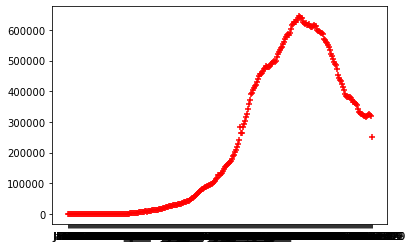

In [11]:
plt.scatter(dates, cases, color = "red", marker = "+")

In [12]:
from datetime import timedelta, date

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2020, 1, 30)
end_dt = date(2020, 11, 29)



date = []
for dt in daterange(start_dt, end_dt):
    date.append(dt.strftime("%Y-%m-%d"))
    



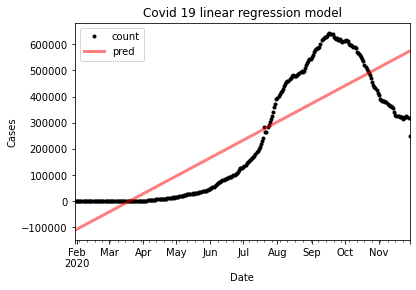

In [14]:
data_time = np.asarray(date)
data_count = np.asarray(cases)

d = pd.DataFrame({'time': data_time, 'count': data_count})
d.time = pd.to_datetime(d.time)

regr = linear_model.LinearRegression()
regr.fit(d.time.values.reshape(-1, 1), d['count'])

# Make predictions using the testing set
y_pred = regr.predict(d.time.values.astype(float).reshape(-1, 1))
d['pred'] = y_pred

ax = d.plot(x='time', y='count', color='black', style='.')
d.plot(x='time', y='pred', color='red', linewidth=3, ax=ax, alpha=0.5)
ax.set_title('Covid 19 linear regression model')
ax.set_xlabel('Date')
ax.set_ylabel('Cases')

plt.show()


In [15]:
# d.describe()
d
d.dtypes
# d.time.describe()

time     datetime64[ns]
count             int32
pred            float64
dtype: object

# for logitic regression we don't have dataset for cases will be there or not(0 and 1 type classifier), thus the probability and accuracy is not upto the mark for this model

In [52]:
# X=d.values[:,:-1]
# X = d.time.values
# Y=d.values[:,-1]
# print(X)
# Y=Y.astype(int)
# Y

X = d.time.values.reshape(-1, 1)
Y = d.values[:,-1]
# print(X)
Y=Y.astype(int)


In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 
scaler.fit(X)
X=scaler.transform(X)
print(X)
#%%Splitting variables into Training & testing 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=10)

[[-1.72638123e+00]
 [-1.71502346e+00]
 [-1.70366569e+00]
 [-1.69230792e+00]
 [-1.68095015e+00]
 [-1.66959238e+00]
 [-1.65823460e+00]
 [-1.64687683e+00]
 [-1.63551906e+00]
 [-1.62416129e+00]
 [-1.61280352e+00]
 [-1.60144575e+00]
 [-1.59008798e+00]
 [-1.57873021e+00]
 [-1.56737243e+00]
 [-1.55601466e+00]
 [-1.54465689e+00]
 [-1.53329912e+00]
 [-1.52194135e+00]
 [-1.51058358e+00]
 [-1.49922581e+00]
 [-1.48786804e+00]
 [-1.47651026e+00]
 [-1.46515249e+00]
 [-1.45379472e+00]
 [-1.44243695e+00]
 [-1.43107918e+00]
 [-1.41972141e+00]
 [-1.40836364e+00]
 [-1.39700587e+00]
 [-1.38564809e+00]
 [-1.37429032e+00]
 [-1.36293255e+00]
 [-1.35157478e+00]
 [-1.34021701e+00]
 [-1.32885924e+00]
 [-1.31750147e+00]
 [-1.30614369e+00]
 [-1.29478592e+00]
 [-1.28342815e+00]
 [-1.27207038e+00]
 [-1.26071261e+00]
 [-1.24935484e+00]
 [-1.23799707e+00]
 [-1.22663930e+00]
 [-1.21528152e+00]
 [-1.20392375e+00]
 [-1.19256598e+00]
 [-1.18120821e+00]
 [-1.16985044e+00]
 [-1.15849267e+00]
 [-1.14713490e+00]
 [-1.1357771

In [24]:
#Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()



In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier.fit(X_train, Y_train)




LogisticRegression()

In [46]:
#Comparing Testing and predicted values
# print(list(zip(Y_test,Y_pred)))
Y_pred=classifier.predict(X_test)
print(Y_pred)




[ 244860  238102  244860  373262   66899   19593  438589   87173   66899
  150248  262881  244860  184038  163764  244860  244860  244860   66899
   66899  431831  249365  240354 -106556  244860  141237  528696  244860
  244860   66899  244860   66899   66899  244860  244860  244860  562486
  244860  244860  166016  244860   66899  244860   66899  355241   66899
  422821  244860   66899   66899  244860   66899  366504  305682   66899
  510675  445347  244860   66899  -11944  244860   66899]


In [47]:
classifier.score(X_test, Y_test)


0.0

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# cfm=confusion_matrix(Y_test,Y_pred)
# print(cfm)

# print("Classification report:")
# print(classification_report(Y_test,Y_pred))

In [57]:
classifier.predict_proba(X_test)

array([[0.0062848 , 0.00201543, 0.00092755, ..., 0.00368893, 0.00377952,
        0.0050874 ],
       [0.00413478, 0.00438493, 0.00360228, ..., 0.00462936, 0.00462549,
        0.00444744],
       [0.00641852, 0.0017595 , 0.00075051, ..., 0.00346148, 0.00355818,
        0.00500551],
       ...,
       [0.0054895 , 0.00307819, 0.00185711, ..., 0.00435688, 0.00441184,
        0.00507477],
       [0.00611041, 0.00229229, 0.00113826, ..., 0.00390356, 0.00398628,
        0.00513411],
       [0.00225703, 0.00561647, 0.00697477, ..., 0.00400502, 0.00393069,
        0.00297325]])

In [58]:
Y_predicted = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_predicted)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Text(69.0, 0.5, 'Truth')

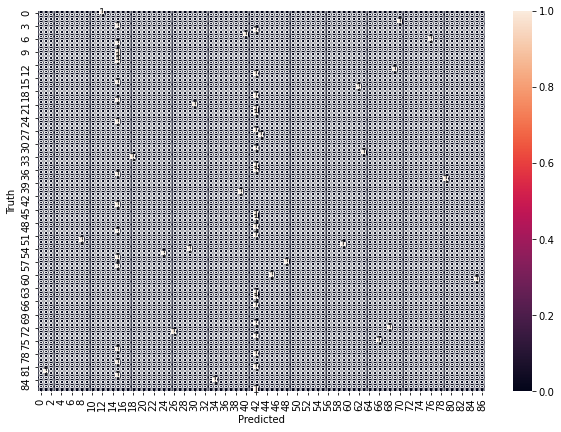

In [59]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')